### Objectives
- Use Linear Regression in one variable to fit the parameters to a model
- Use Linear Regression in multiple variables to fit the parameters to a model
- Use Polynomial Regression in single variable to fit the parameters to a model
- Create a pipeline for performing linear regression using multiple features in polynomial scaling
- Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(file_path, header=0)
df

,Unnamed: 0,Unnamed: 0.1,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


## 1. Single Linear Regression (SLR)

Since CPU_frequency is the feature with the lowest p-value among the other independent variables in the dataset. Construct a linear Regression Model using **"CPU_frequency"** for prediction.

In [11]:
# Create a linear regression object
lm = LinearRegression()

X = df[["CPU_frequency"]]
Y = df["Price"]

# Fit the model with the independent variables
lm.fit(X,Y)

# Make a prediction
Yhat=lm.predict(X)
Yhat

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057, 1073.07834392, 1073.07834392, 1073.07834392,
       1534.00050386, 1175.50549057, 1175.50549057, 1277.93263722,
       1277.93263722, 1073.07834392, 1073.07834392, 1534.00050386,
       1175.50549057, 1175.50549057, 1073.07834392, 1073.07834392,
       1175.50549057, 1534.00050386, 1175.50549057, 1534.00050386,
       1636.42765051, 1277.93263722, 1482.78693053, 1636.42765051,
       1636.42765051, 1534.00050386, 1636.42765051, 1636.42765051,
       1073.07834392, 1175.50549057, 1073.07834392, 1175.50549057,
       1636.42765051, 1175.50549057, 1534.00050386, 1073.07834392,
       1175.50549057, 1636.42765051, 1073.07834392, 1073.07834392,
       1073.07834392, 1687.64122384, 1073.07834392, 1534.00050386,
       1073.07834392, 1073.07834392,  868.22405061, 1175.50549057,
       1175.50549057, 1175.50549057, 1175.50549057, 1073.07834392,
       1073.07834392, 1534.00050386, 1636.42765051, 1534.00050

C:\Users\rofia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rofia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


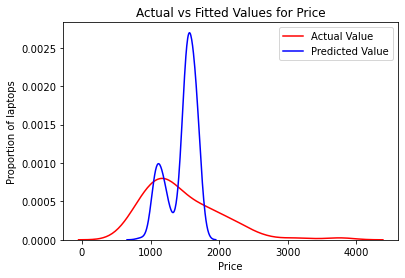

In [10]:
# Generate a distribution plot for the result
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [12]:
# Evaluate the Mean Squared Error and R^2 score values for the model.
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


## 2. Multiple Linear Regression (MLR)

The parameters which have a low enough p-value so as to indicate strong relationship with the **'Price'** value are **'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'**. Use all these variables to create a Multiple Linear Regression system.

In [14]:
# Create the linear Regressioon object
lm1 = LinearRegression()

# Fit the model with the independent variables
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]

lm1.fit(Z, df["Price"])

# Make a  prediction
Yhat = lm1.predict(Z)
Yhat

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022, 1056.42067418, 1252.02084839,  806.98504446,
       1007.51446753, 1449.64309091, 1254.0429167 ,  757.73972448,
        380.80382381, 1345.51622771, 1154.22076129, 1452.55027146,
       1445.33838312, 1254.0429167 , 1345.51622771, 1154.22076129,
       1640.93855733, 1452.55027146, 1543.13847022, 1167.75942573,
       1841.4679804 ,  283.00373671, 1212.25798099, 1552.37242687,
       1939.2680675 , 1376.73250015, 1939.2680675 , 1650.17251398,
       1345.51622771, 1449.64309091, 1154.22076129, 1543.13847022,
       1138.08329264, 1351.8430038 , 1105.31455464, 1056.42067418,
       1543.13847022, 1362.90546776,  882.80281577,  904.78513157,
       1056.42067418, 2093.00082524, 1252.02084839, 1643.84573788,
       1252.02084839, 1345.51622771, 1212.9253343 , 1449.64309091,
       1543.13847022, 1445.33838312, 1449.64309091, 1345.51622771,
        628.97535593, 1775.17253369, 1747.97260108, 1550.35035

C:\Users\rofia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rofia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


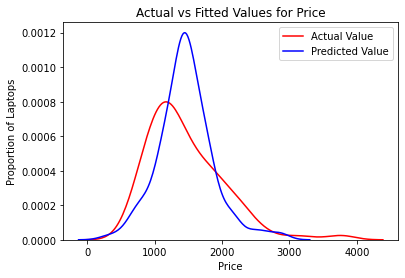

In [16]:
# Plot the Distribution graph of the predicted values as well as the Actual values

ax1 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of Laptops")
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [21]:
# Evaluate the MSE and R^2 for this fit
mse_mlr = mean_squared_error(df['Price'], Yhat)
r2_score_mlr = lm1.score(Z, Y)
print('The R-square for Linear Regression is: ', r2_score_mlr)
print('The mean square error of price and predicted value is: ', mse_mlr)

The R-square for Linear Regression is:  0.5082509055187374
The mean square error of price and predicted value is:  161680.57263893107


## 3. Polynomial Regression
Using 3 different values of polynomial degrees, create polynomial features using "CPU_frequency"

In [22]:
# Create a polynomial features using "CPU_frequency"
X = df["CPU_frequency"]
Y = df["Price"]

X = X.to_numpy().flatten()

# 1 degree
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

# 3 degrees
f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

# 5 degrees
f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

Plot the Regression output against the actual data points using PlotPolly function.

In [28]:
# Create a function to generate the regression plot 
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

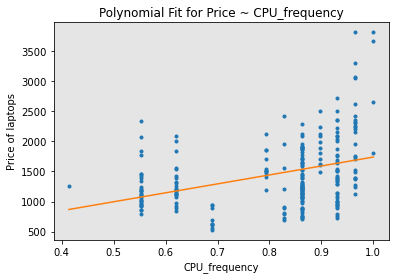

In [25]:
# Polynomial fit for degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

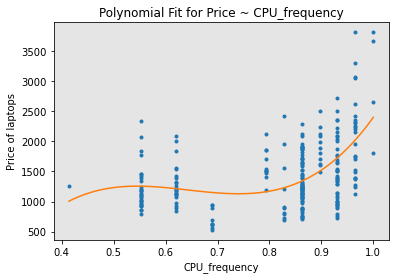

In [26]:
# Polynomial fit for degree 3
PlotPolly(p3, X, Y, 'CPU_frequency')

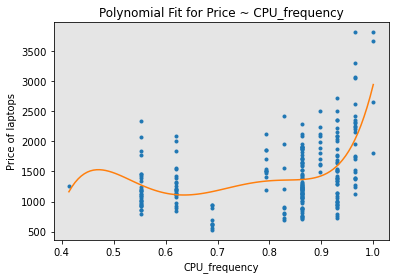

In [27]:
# Polynomial fit for degree 5
PlotPolly(p5, X, Y, 'CPU_frequency')

In [29]:
# Calculate the MSE and R^2 using the sklearn.metrics function
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))

r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))

r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))


The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531053
The MSE value for 3rd degree polynomial is:  241024.86303848788
The R-square value for 5th degree polynomial is:  0.3030822706442695
The MSE value for 5th degree polynomial is:  229137.29548057468


## 4. Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression using the multiple features.

In [30]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [31]:
# Evaluate the MSE and R^2
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  123299.09033613445
R^2 for multi-variable polynomial pipeline is:  0.624987621991154


## Conclusion:

It is evident that the values of R^2 inreases from SLR to MLR. Additionally, using polynomial features for MLR produced an even better R^2 value.